In [1]:
import QUANTAXIS as QA
try:
    assert QA.__version__>='1.0.46'
except AssertionError:
    print('pip install QUANTAXIS >= 1.0.46 请升级QUANTAXIS后再运行此示例')

QUANTAXIS>> start QUANTAXIS
QUANTAXIS>> Welcome to QUANTAXIS, the Version is 1.0.68
QUANTAXIS>>  
 ```````````````````````````````````````````````````````````````````````````````````````````````````````````````````````` 
  ``########`````##````````##``````````##`````````####````````##```##########````````#``````##``````###```##`````######`` 
  `##``````## ```##````````##`````````####````````##`##```````##```````##```````````###``````##````##`````##```##`````##` 
  ##````````##```##````````##````````##`##````````##``##``````##```````##``````````####```````#```##``````##```##``````## 
  ##````````##```##````````##```````##```##```````##```##`````##```````##`````````##`##```````##`##```````##````##``````` 
  ##````````##```##````````##``````##`````##``````##````##````##```````##````````##``###```````###````````##`````##`````` 
  ##````````##```##````````##``````##``````##`````##`````##```##```````##```````##````##```````###````````##``````###```` 
  ##````````##```##````````##`````##`````

In [2]:
print('首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库')

首先确定你已经完成了对于QUANTAXIS的基础认知,以及在本地存储完毕了QUANTAXIS的数据库


# QUANTAXIS 回测的一些基础知识

##  QA回测的核心是两个类

```
QA_BacktestBroker
QA_Account
```

##  回测数据的引入/迭代

```
QA.QA_fetch_stock_day_adv
QA.QA_fetch_stock_min_adv
```

##  指标的计算

```
DataStruct.add_func
```

##  对于账户的灵活运用

```
QA_Account
QA_Risk
QA_Portfolio
QA_PortfolioView
QA_User
```

## STEP1 初始化账户,初始化回测broker

In [3]:
Account=QA.QA_Account()
Broker=QA.QA_BacktestBroker()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [4]:
import warnings

In [5]:
# 打印账户的信息
try:
    from pprint import  pprint as print
except:
    pass
print(Account.message)

{'account_cookie': 'Acc_WyE2OLJd',
 'allow_sellopen': False,
 'allow_t0': False,
 'broker': 'backtest',
 'cash': [1000000],
 'commission_coeff': 0.00025,
 'current_time': 'None',
 'history': [],
 'init_assets': {'cash': 1000000, 'hold': {}},
 'margin_level': False,
 'market_type': 'stock_cn',
 'portfolio_cookie': None,
 'quantaxis_version': '1.0.68',
 'running_environment': 'backtest',
 'running_time': '2018-07-19 14:54:16.602847',
 'source': 'account',
 'strategy_name': None,
 'tax_coeff': 0.0015,
 'trade_index': [],
 'user_cookie': None}


## 首先讲解Account类:

QA_Account在初始化的时候,可以自己指定很多信息:

```

    QA_Account(
        strategy_name=None, user_cookie=None, portfolio_cookie=None, account_cookie=None,
        market_type=MARKET_TYPE.STOCK_CN, frequence=FREQUENCE.DAY, broker=BROKER_TYPE.BACKETEST,
        init_hold={}, init_cash=1000000, commission_coeff=0.00025, tax_coeff=0.0015,
        margin_level=False, allow_t0=False, allow_sellopen=False,
        running_environment=RUNNING_ENVIRONMENT.BACKETEST)

        :param [str] strategy_name:  策略名称
        :param [str] user_cookie:   用户cookie
        :param [str] portfolio_cookie: 组合cookie
        :param [str] account_cookie:   账户cookie

        :param [dict] init_hold         初始化时的股票资产
        :param [float] init_cash:         初始化资金
        :param [float] commission_coeff:  交易佣金 :默认 万2.5   float 类型
        :param [float] tax_coeff:         印花税   :默认 千1.5   float 类型

        :param [Bool] margin_level:      保证金比例 默认False
        :param [Bool] allow_t0:          是否允许t+0交易  默认False
        :param [Bool] allow_sellopen:    是否允许卖空开仓  默认False

        :param [QA.PARAM] market_type:   市场类别 默认QA.MARKET_TYPE.STOCK_CN A股股票
        :param [QA.PARAM] frequence:     账户级别 默认日线QA.FREQUENCE.DAY
        :param [QA.PARAM] broker:        BROEKR类 默认回测 QA.BROKER_TYPE.BACKTEST
        :param [QA.PARAM] running_environment 当前运行环境 默认Backtest

        # 2018/06/11 init_assets 从float变为dict,并且不作为输入,作为只读属性
        #  :param [float] init_assets:       初始资产  默认 1000000 元 （100万）
        init_assets:{
            cash: xxx,
            stock: {'000001':2000},
            init_date: '2018-02-05',
            init_datetime: '2018-02-05 15:00:00'
        }
        # 2018/06/11 取消在初始化的时候的cash和history输入
        # :param [list] cash:              可用现金  默认 是 初始资产  list 类型
        # :param [list] history:           交易历史
```

In [6]:
# 重设账户初始资金

Account.reset_assets(200000)
Account.account_cookie='JCSC_EXAMPLE'

In [7]:
Account.init_assets

{'cash': 200000, 'hold': {}}

Account 有很多方法,暂时不详细展开,我们先直接进入下一步

# SETP2:引入回测的市场数据

引入方法非常简单,直接使用QA_fetch_stock_day_adv系列即可

- code 可以是多种多样的选取方式

```python
1. QA.QA_fetch_stock_list_adv().code.tolist() # 获取全市场的股票代码
2. QA.QA_fetch_stock_block_adv().get_block('云计算').code  # 按版块选取
3. code= ['000001','000002'] # 自己指定
```
- 数据获取后,to_qfq() 即可获得前复权数据

```python
data=DataSturct.to_qfq()
```

In [8]:
# QA.QA_fetch_stock_list_adv().code.tolist()
# QA.QA_fetch_stock_block_adv().get_block('云计算').code
codelist=QA.QA_fetch_stock_block_adv().get_block('云计算').code

In [9]:
data=QA.QA_fetch_stock_day_adv(codelist,'2017-09-01','2018-05-20')

In [10]:
data

< QA_DataStruct_Stock_day with 108 securities >

In [11]:
data=data.to_qfq()

In [12]:
# data.data

## STEP3:计算一些指标

指标的计算可以在回测前,也可以在回测中进行

回测前的计算则是批量计算,效率较高

回测中的计算,效率略低,但代码量较小,易于理解

PS: 指标的相关介绍参见 [QUANTAXIS的指标系统](https://github.com/QUANTAXIS/QUANTAXIS/blob/master/Documents/indicators.md)

In [13]:
import numpy as np
import pandas as pd
def MACD_JCSC(dataframe,SHORT=12,LONG=26,M=9):
    """
    1.DIF向上突破DEA，买入信号参考。
    2.DIF向下跌破DEA，卖出信号参考。
    """
    CLOSE=dataframe.close
    DIFF =QA.EMA(CLOSE,SHORT) - QA.EMA(CLOSE,LONG)
    DEA = QA.EMA(DIFF,M)
    MACD =2*(DIFF-DEA)

    CROSS_JC=QA.CROSS(DIFF,DEA)
    CROSS_SC=QA.CROSS(DEA,DIFF)
    ZERO=0
    return pd.DataFrame({'DIFF':DIFF,'DEA':DEA,'MACD':MACD,'CROSS_JC':CROSS_JC,'CROSS_SC':CROSS_SC,'ZERO':ZERO})

In [14]:
ind=data.add_func(MACD_JCSC)

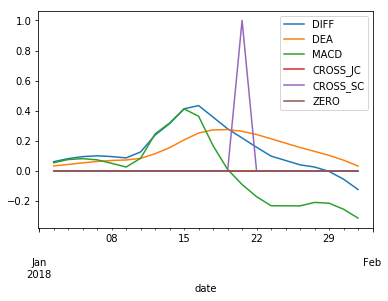

In [15]:
ind.xs(codelist[0],level=1)['2018-01'].plot()

In [16]:
ind.xs(codelist[0],level=1)['2018-01']

,DIFF,DEA,MACD,CROSS_JC,CROSS_SC,ZERO
date,,,,,,
2018-01-02,0.062832,0.034908,0.055848,0,0,0
2018-01-03,0.083081,0.044543,0.077076,0,0,0
2018-01-04,0.096405,0.054915,0.082979,0,0,0
2018-01-05,0.101761,0.064284,0.074953,0,0,0
2018-01-08,0.096831,0.070794,0.052074,0,0,0
2018-01-09,0.087880,0.074211,0.027338,0,0,0
2018-01-10,0.127678,0.084904,0.085548,0,0,0
2018-01-11,0.239488,0.115821,0.247333,0,0,0
2018-01-12,0.315590,0.155775,0.319631,0,0,0


In [17]:
ind.loc['2018-01',slice(None)]

DIFF       DEA      MACD  CROSS_JC  CROSS_SC  ZERO
date       code                                                          
2018-01-02 000021  0.062832  0.034908  0.055848         0         0     0
           000063  0.350531  0.539474 -0.377886         0         0     0
           000066 -0.103693 -0.164662  0.121938         0         0     0
           000070 -0.298122 -0.297769 -0.000706         0         0     0
           000100 -0.111283 -0.109635 -0.003296         0         0     0
           000555       NaN       NaN       NaN         0         0     0
           000611  0.085137  0.038461  0.093353         0         0     0
           000665 -0.128508 -0.179685  0.102356         0         0     0
           000836 -0.094147       NaN       NaN         0         0     0
           000938  1.251292  0.414957  1.672669         0         0     0
           000948 -0.138808 -0.163646  0.049677         0         0     0
           000977  0.147261  0.089319  0.115885         0         0     0
           002063 -0.000718 -0.041517  0.081599         0         0     0
           002065 -0.330897 -0.311772 -0.038251         0         0     0
           002093  0.071611  0.040341  0.062539         0         0     0
           002095 -0.141841 -0.246130  0.208579         0         0     0
           002195 -0.150915 -0.158826  0.015820         1         0     0
           002197 -0.039920 -0.026400 -0.027039         0         0     0
           002268 -0.282747 -0.095097 -0.375300         0         0     0
           002279 -0.207586 -0.179862 -0.055448         0         0     0
           002281  0.155791  0.417276 -0.522969         0         0     0
           002301 -0.029081  0.022214 -0.102589         0         0     0
           002315 -0.741722 -0.618039 -0.247365         0         0     0
           002368 -0.415162 -0.345593 -0.139139         0         0     0
           002396 -0.372709 -0.313333 -0.118752         0         0     0
           002415  0.137828  0.117979  0.039697         0         0     0
           002417 -0.315567 -0.213388 -0.204357         0         0     0
           002439 -0.110629  0.036764 -0.294787         0         0     0
           002456 -0.644033 -0.682755  0.077443         1         0     0
           002463 -0.032976  0.015482 -0.096915         0         0     0
...                     ...       ...       ...       ...       ...   ...
2018-01-31 600225 -0.058853 -0.031449 -0.054807         0         0     0
           600289 -1.171529 -1.205996  0.068934         0         0     0
           600385 -0.338182 -0.307123 -0.062117         0         0     0
           600410 -0.088613 -0.075791 -0.025643         0         1     0
           600522 -0.557657 -0.468933 -0.177448         0         0     0
           600536 -0.648704 -0.408761 -0.479886         0         0     0
           600588  0.427037  0.260356  0.333362         0         0     0
           600589  0.004017  0.018157 -0.028280         0         1     0
           600590 -0.192047 -0.194900  0.005705         0         0     0
           600595 -0.069449 -0.013864 -0.111170         0         0     0
           600601 -0.071518 -0.047553 -0.047930         0         0     0
           600602 -0.020619  0.022803 -0.086844         0         0     0
           600633  0.138275  0.143204 -0.009859         0         1     0
           600718 -0.372869 -0.327002 -0.091732         0         0     0
           600728 -0.229830 -0.186326 -0.087007         0         0     0
           600756 -0.269601 -0.191433 -0.156336         0         0     0
           600767 -0.135812 -0.156087  0.040549         0         0     0
           600770 -0.135974 -0.112889 -0.046169         0         0     0
           600797 -0.134989 -0.070951 -0.128076         0         0     0
           600804 -0.353543 -0.371659  0.036233         0         0     0
           600845  0.294369  0.367704 -0.146669         0         0     0
           600850 -0.756647

# SETP4:选取回测的开始和结束日期,构建回测

In [18]:
data_forbacktest=data.select_time('2018-01-01','2018-05-01')


for items in data_forbacktest.panel_gen:
    for item in items.security_gen:
        daily_ind=ind.loc[item.index]
        if daily_ind.CROSS_JC.iloc[0]>0:
            order=Account.send_order(
                code=item.code[0], 
                time=item.date[0], 
                amount=1000, 
                towards=QA.ORDER_DIRECTION.BUY, 
                price=0, 
                order_model=QA.ORDER_MODEL.CLOSE, 
                amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                )
            Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
        elif daily_ind.CROSS_SC.iloc[0]>0:
            if Account.sell_available.get(item.code[0], 0)>0:
                order=Account.send_order(
                    code=item.code[0], 
                    time=item.date[0], 
                    amount=Account.sell_available.get(item.code[0], 0), 
                    towards=QA.ORDER_DIRECTION.SELL, 
                    price=0, 
                    order_model=QA.ORDER_MODEL.MARKET, 
                    amount_model=QA.AMOUNT_MODEL.BY_AMOUNT
                    )
                Account.receive_deal(Broker.receive_order(QA.QA_Event(order=order,market_data=item)))
    Account.settle()
            
        #break

{'header': {'source': 'market', 'status': 200, 'code': '603019', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Tt85RAnV', 'trade_id': 'Trade_ecMGZIHN'}, 'body': {'order': {'price': 42.61, 'code': '603019', 'amount': 1000, 'date': '2018-01-03', 'datetime': '2018-01-03 15:00:00', 'towards': 1}, 'fee': {'commission': 10.6525, 'tax': 0}}}
12414.804999999993
NOT ENOUGH MONEY FOR {'price': 42.61, 'code': '603019', 'amount': 1000, 'date': '2018-01-03', 'datetime': '2018-01-03 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '002396', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Iq3aNlAe', 'trade_id': 'Trade_IUp3zynX'}, 'body': {'order': {'price': 21.98, 'code': '002396', 'amount': 1000, 'date': '2018-01-04', 'datetime': '2018-01-04 15:00:00', 'towards': 1}, 'fee': {'commission': 5.495, 'tax': 0}}}
12414.804999999993
NOT ENOUGH MONEY FOR {'price': 21.98, 'code': '002396', '

{'header': {'source': 'market', 'status': 200, 'code': '300311', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_TKvwegrS', 'trade_id': 'Trade_sPbAlx5d'}, 'body': {'order': {'price': 14.09, 'code': '300311', 'amount': 1000, 'date': '2018-01-11', 'datetime': '2018-01-11 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6138.127499999991
NOT ENOUGH MONEY FOR {'price': 14.09, 'code': '300311', 'amount': 1000, 'date': '2018-01-11', 'datetime': '2018-01-11 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300367', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_i1aQOjHX', 'trade_id': 'Trade_Ti7jnKP8'}, 'body': {'order': {'price': 15.04, 'code': '300367', 'amount': 1000, 'date': '2018-01-11', 'datetime': '2018-01-11 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6138.127499999991
NOT ENOUGH MONEY FOR {'price': 15.04, 'code': '300367', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '300168', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_AiH5Yz7o', 'trade_id': 'Trade_VLMNYFag'}, 'body': {'order': {'price': 14.0, 'code': '300168', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
571.6162499999882
NOT ENOUGH MONEY FOR {'price': 14.0, 'code': '300168', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300274', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_EMoHXIvY', 'trade_id': 'Trade_XML6veng'}, 'body': {'order': {'price': 17.62, 'code': '300274', 'amount': 1000, 'date': '2018-01-24', 'datetime': '2018-01-24 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
571.6162499999882
NOT ENOUGH MONEY FOR {'price': 17.62, 'code': '300274', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '600590', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Gr8OwMHF', 'trade_id': 'Trade_LMwJW1zA'}, 'body': {'order': {'price': 10.37, 'code': '600590', 'amount': 1000, 'date': '2018-01-25', 'datetime': '2018-01-25 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
571.6162499999882
NOT ENOUGH MONEY FOR {'price': 10.37, 'code': '600590', 'amount': 1000, 'date': '2018-01-25', 'datetime': '2018-01-25 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '002368', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_GRcvjDMi', 'trade_id': 'Trade_lFOQqTCx'}, 'body': {'order': {'price': 23.35, 'code': '002368', 'amount': 1000, 'date': '2018-01-26', 'datetime': '2018-01-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5.8375, 'tax': 0}}}
571.6162499999882
NOT ENOUGH MONEY FOR {'price': 23.35, 'code': '002368', 'amount'

{'header': {'source': 'market', 'status': 200, 'code': '600845', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_1IwOe2rQ', 'trade_id': 'Trade_3PIVDtgK'}, 'body': {'order': {'price': 21.44, 'code': '600845', 'amount': 1000, 'date': '2018-02-12', 'datetime': '2018-02-12 15:00:00', 'towards': 1}, 'fee': {'commission': 5.36, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 21.44, 'code': '600845', 'amount': 1000, 'date': '2018-02-12', 'datetime': '2018-02-12 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '002368', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_RUNaVTLu', 'trade_id': 'Trade_jwLYSxGc'}, 'body': {'order': {'price': 21.39, 'code': '002368', 'amount': 1000, 'date': '2018-02-13', 'datetime': '2018-02-13 15:00:00', 'towards': 1}, 'fee': {'commission': 5.3475, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 21.39, 'code': '002368', 'am

{'header': {'source': 'market', 'status': 200, 'code': '300036', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_rqNEIWcB', 'trade_id': 'Trade_R2Xxc4ol'}, 'body': {'order': {'price': 13.81, 'code': '300036', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 13.81, 'code': '300036', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300078', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_wzAvXbBJ', 'trade_id': 'Trade_S1ClDcj3'}, 'body': {'order': {'price': 8.3, 'code': '300078', 'amount': 1000, 'date': '2018-02-22', 'datetime': '2018-02-22 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 8.3, 'code': '300078', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '300249', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_QDWIhsFO', 'trade_id': 'Trade_lvS9Xmji'}, 'body': {'order': {'price': 6.15, 'code': '300249', 'amount': 1000, 'date': '2018-02-23', 'datetime': '2018-02-23 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 6.15, 'code': '300249', 'amount': 1000, 'date': '2018-02-23', 'datetime': '2018-02-23 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300297', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Ew2c1o3C', 'trade_id': 'Trade_dZztyX5G'}, 'body': {'order': {'price': 8.96, 'code': '300297', 'amount': 1000, 'date': '2018-02-23', 'datetime': '2018-02-23 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 8.96, 'code': '300297', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '300052', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Iewf6pcd', 'trade_id': 'Trade_GIAVMyvB'}, 'body': {'order': {'price': 13.38, 'code': '300052', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 13.38, 'code': '300052', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300085', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_ajYRK9p3', 'trade_id': 'Trade_tZ7gqXTb'}, 'body': {'order': {'price': 14.08, 'code': '300085', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 14.08, 'code': '300085', 'amount': 1

{'header': {'source': 'market', 'status': 200, 'code': '603003', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_ioplSNhH', 'trade_id': 'Trade_tWR0r9j7'}, 'body': {'order': {'price': 10.71, 'code': '603003', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 10.71, 'code': '603003', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '603528', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_vFLVN6SK', 'trade_id': 'Trade_axcnFOBS'}, 'body': {'order': {'price': 7.66, 'code': '603528', 'amount': 1000, 'date': '2018-02-26', 'datetime': '2018-02-26 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 7.66, 'code': '603528', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '600225', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_zx0qd1tw', 'trade_id': 'Trade_NY1T7Zqk'}, 'body': {'order': {'price': 4.09, 'code': '600225', 'amount': 1000, 'date': '2018-02-27', 'datetime': '2018-02-27 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 4.09, 'code': '600225', 'amount': 1000, 'date': '2018-02-27', 'datetime': '2018-02-27 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '600589', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_CRTJ8QGW', 'trade_id': 'Trade_cSdas2T7'}, 'body': {'order': {'price': 5.58, 'code': '600589', 'amount': 1000, 'date': '2018-02-27', 'datetime': '2018-02-27 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1640.9574999999822
NOT ENOUGH MONEY FOR {'price': 5.58, 'code': '600589', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '300078', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_dicJwxhk', 'trade_id': 'Trade_eWxyoD6A'}, 'body': {'order': {'price': 10.3, 'code': '300078', 'amount': 1000, 'date': '2018-03-28', 'datetime': '2018-03-28 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6550.062500000029
NOT ENOUGH MONEY FOR {'price': 10.3, 'code': '300078', 'amount': 1000, 'date': '2018-03-28', 'datetime': '2018-03-28 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300311', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_Kw6U3VZf', 'trade_id': 'Trade_Jn0zTASf'}, 'body': {'order': {'price': 13.92, 'code': '300311', 'amount': 1000, 'date': '2018-03-28', 'datetime': '2018-03-28 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6550.062500000029
NOT ENOUGH MONEY FOR {'price': 13.92, 'code': '300311', 'amount': 1000,

{'header': {'source': 'market', 'status': 200, 'code': '300020', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_DXhvJIi7', 'trade_id': 'Trade_1eJcIipu'}, 'body': {'order': {'price': 11.95, 'code': '300020', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
6550.062500000029
NOT ENOUGH MONEY FOR {'price': 11.95, 'code': '300020', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300271', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_TvwxJt1Q', 'trade_id': 'Trade_t5GVdU0R'}, 'body': {'order': {'price': 20.49, 'code': '300271', 'amount': 1000, 'date': '2018-03-30', 'datetime': '2018-03-30 15:00:00', 'towards': 1}, 'fee': {'commission': 5.1225, 'tax': 0}}}
6550.062500000029
NOT ENOUGH MONEY FOR {'price': 20.49, 'code': '300271', 'amount'

{'header': {'source': 'market', 'status': 200, 'code': '300245', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_8XLEsIS4', 'trade_id': 'Trade_Alz7N8LT'}, 'body': {'order': {'price': 13.83, 'code': '300245', 'amount': 1000, 'date': '2018-04-02', 'datetime': '2018-04-02 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
925.0625000000291
NOT ENOUGH MONEY FOR {'price': 13.83, 'code': '300245', 'amount': 1000, 'date': '2018-04-02', 'datetime': '2018-04-02 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '600100', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_LdRBASDe', 'trade_id': 'Trade_bQp5iJql'}, 'body': {'order': {'price': 10.97, 'code': '600100', 'amount': 1000, 'date': '2018-04-02', 'datetime': '2018-04-02 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
925.0625000000291
NOT ENOUGH MONEY FOR {'price': 10.97, 'code': '600100', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '300020', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_YG6XCgdM', 'trade_id': 'Trade_D82W7fYJ'}, 'body': {'order': {'price': 11.89, 'code': '300020', 'amount': 1000, 'date': '2018-04-13', 'datetime': '2018-04-13 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
5333.566250000033
NOT ENOUGH MONEY FOR {'price': 11.89, 'code': '300020', 'amount': 1000, 'date': '2018-04-13', 'datetime': '2018-04-13 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300052', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_np0ECqUi', 'trade_id': 'Trade_tZW6SmJO'}, 'body': {'order': {'price': 14.78, 'code': '300052', 'amount': 1000, 'date': '2018-04-13', 'datetime': '2018-04-13 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
5333.566250000033
NOT ENOUGH MONEY FOR {'price': 14.78, 'code': '300052', 'amount': 100

{'header': {'source': 'market', 'status': 200, 'code': '300271', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_PoQL4qAN', 'trade_id': 'Trade_tKpbLDaT'}, 'body': {'order': {'price': 20.85, 'code': '300271', 'amount': 1000, 'date': '2018-04-18', 'datetime': '2018-04-18 15:00:00', 'towards': 1}, 'fee': {'commission': 5.2125, 'tax': 0}}}
1911.021250000027
NOT ENOUGH MONEY FOR {'price': 20.85, 'code': '300271', 'amount': 1000, 'date': '2018-04-18', 'datetime': '2018-04-18 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300302', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_GPqA5Qwz', 'trade_id': 'Trade_iD2E6lWr'}, 'body': {'order': {'price': 14.94, 'code': '300302', 'amount': 1000, 'date': '2018-04-18', 'datetime': '2018-04-18 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
1911.021250000027
NOT ENOUGH MONEY FOR {'price': 14.94, 'code': '300302', 'amount'

{'header': {'source': 'market', 'status': 200, 'code': '300044', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_2qOCrKzt', 'trade_id': 'Trade_trTb0Hes'}, 'body': {'order': {'price': 18.98, 'code': '300044', 'amount': 1000, 'date': '2018-04-25', 'datetime': '2018-04-25 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
4935.937500000029
NOT ENOUGH MONEY FOR {'price': 18.98, 'code': '300044', 'amount': 1000, 'date': '2018-04-25', 'datetime': '2018-04-25 15:00:00', 'towards': 1}
{'header': {'source': 'market', 'status': 200, 'code': '300168', 'session': {'user': None, 'strategy': None, 'account': 'JCSC_EXAMPLE'}, 'order_id': 'Order_SGnmCbWf', 'trade_id': 'Trade_SzkyboJ2'}, 'body': {'order': {'price': 19.0, 'code': '300168', 'amount': 1000, 'date': '2018-04-25', 'datetime': '2018-04-25 15:00:00', 'towards': 1}, 'fee': {'commission': 5, 'tax': 0}}}
4935.937500000029
NOT ENOUGH MONEY FOR {'price': 19.0, 'code': '300168', 'amount': 1000,

## STEP5: 分析账户

In [19]:
Account.history

[['2018-01-02 15:00:00',
  '002195',
  5.91,
  1000.0,
  194085.0,
  'Order_LzeIGTaJ',
  'Trade_VrZAuDCl',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '002456',
  20.78,
  1000.0,
  173299.805,
  'Order_wvIRrxCq',
  'Trade_9BfzOZLv',
  'JCSC_EXAMPLE',
  5.195,
  0.0],
 ['2018-01-02 15:00:00',
  '002544',
  15.85,
  1000.0,
  157444.805,
  'Order_nE2wRU4O',
  'Trade_j2mKE7eN',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '300290',
  8.71,
  1000.0,
  148729.805,
  'Order_s3QEDZB6',
  'Trade_vgFzQ4lH',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '300367',
  15.39,
  1000.0,
  133334.805,
  'Order_M3rWunkv',
  'Trade_1Jv0398w',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '600105',
  6.58,
  1000.0,
  126749.805,
  'Order_hjKBomGR',
  'Trade_vDaJlV0B',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 ['2018-01-02 15:00:00',
  '600797',
  11.87,
  1000.0,
  114874.805,
  'Order_3m9PEGKM',
  'Trade_dxKn9DQE',
  'JCSC_EXAMPLE',
  5.0,
  0.0],
 [

In [20]:
Account.history_table

,datetime,code,price,amount,cash,order_id,trade_id,account_cookie,commission,tax
0,2018-01-02 15:00:00,002195,5.91,1000.0,194085.00000,Order_LzeIGTaJ,Trade_VrZAuDCl,JCSC_EXAMPLE,5.00000,0.0000
1,2018-01-02 15:00:00,002456,20.78,1000.0,173299.80500,Order_wvIRrxCq,Trade_9BfzOZLv,JCSC_EXAMPLE,5.19500,0.0000
2,2018-01-02 15:00:00,002544,15.85,1000.0,157444.80500,Order_nE2wRU4O,Trade_j2mKE7eN,JCSC_EXAMPLE,5.00000,0.0000
3,2018-01-02 15:00:00,300290,8.71,1000.0,148729.80500,Order_s3QEDZB6,Trade_vgFzQ4lH,JCSC_EXAMPLE,5.00000,0.0000
4,2018-01-02 15:00:00,300367,15.39,1000.0,133334.80500,Order_M3rWunkv,Trade_1Jv0398w,JCSC_EXAMPLE,5.00000,0.0000
5,2018-01-02 15:00:00,600105,6.58,1000.0,126749.80500,Order_hjKBomGR,Trade_vDaJlV0B,JCSC_EXAMPLE,5.00000,0.0000
6,2018-01-02 15:00:00,600797,11.87,1000.0,114874.80500,Order_3m9PEGKM,Trade_dxKn9DQE,JCSC_EXAMPLE,5.00000,0.0000
7,2018-01-03 15:00:00,000070,9.52,1000.0,105349.80500,Order_M2xSgz98,Trade_xEbYfm3K,JCSC_EXAMPLE,5.00000,0.0000
8,2018-01-03 15:00:00,000100,3.99,1000.0,101354.80500,Order_zK9B5aO2,Trade_Zo6Y1IEW,JCSC_EXAMPLE,5.00000,0.0000
9,2018-01-03 15:00:00,002065,8.53,1000.0,92819.80500,Order_9Fk38XE7,Trade_czuqhk13,JCSC_EXAMPLE,5.00000,0.0000


In [21]:
Account.daily_hold

,code,000063,000066,000070,000100,000611,000836,000948,000977,002063,002065,...,600756,600770,600797,600804,600845,600850,600996,601360,601928,603138
date,account_cookie,,,,,,,,,,,,,,,,,,,,,
2018-01-02,JCSC_EXAMPLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-03,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0
2018-01-04,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0
2018-01-08,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0
2018-01-09,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0
2018-01-10,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-11,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-12,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-15,JCSC_EXAMPLE,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,1000.0,...,0.0,0.0,1000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
Risk=QA.QA_Risk(Account)

In [23]:
Risk.message

{'account_cookie': 'JCSC_EXAMPLE',
 'portfolio_cookie': None,
 'user_cookie': None,
 'annualize_return': -0.12,
 'profit': -0.04,
 'max_dropback': 0.11,
 'time_gap': 77,
 'volatility': 0.36,
 'benchmark_code': '000300',
 'bm_annualizereturn': -0.26,
 'bn_profit': -0.07,
 'beta': 1.0,
 'alpha': 0.14,
 'sharpe': -0.47,
 'init_cash': '200000.00',
 'last_assets': '192783.18',
 'total_tax': -1593.88,
 'total_commission': -842.94,
 'profit_money': -7216.82}

In [24]:
Risk.market_value.diff().iloc[-1]

code
000063        0.0
000066        0.0
000070        0.0
000100        0.0
000611      -10.0
000836     -230.0
000948     -240.0
000977        0.0
002063   -11720.0
002065      -90.0
002095        0.0
002195        0.0
002197        0.0
002279        0.0
002281        0.0
002396        0.0
002417        0.0
002439        0.0
002456        0.0
002463      -60.0
002544      180.0
002642        0.0
002837        0.0
300025        0.0
300036        0.0
300044        0.0
300052    14340.0
300085        0.0
300113        0.0
300128        0.0
300212        0.0
300229        0.0
300245       10.0
300271        0.0
300274      -20.0
300287        0.0
300290        0.0
300297        0.0
300365        0.0
300366       10.0
300367        0.0
300431        0.0
600105       30.0
600198     -430.0
600385        0.0
600589      140.0
600595       30.0
600601     -310.0
600718        0.0
600756        0.0
600770        0.0
600797        0.0
600804      -10.0
600845        0.0
600850        0.0
60099

In [25]:
Risk.account.cash_table

cash             datetime       date  \
datetime            account_cookie                                            
2018-01-02 15:00:00 JCSC_EXAMPLE     194085  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     173300  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     157445  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     148730  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     133335  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     126750  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     114875  2018-01-02 15:00:00 2018-01-02   
2018-01-03 15:00:00 JCSC_EXAMPLE     105350  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE     101355  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    92819.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    76964.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    65309.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    50304.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    32369.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    12414.8  2018-01-03 15:00:00 2018-01-03   
2018-01-04 15:00:00 JCSC_EXAMPLE     4939.8  2018-01-04 15:00:00 2018-01-04   
2018-01-08 15:00:00 JCSC_EXAMPLE     1254.8  2018-01-08 15:00:00 2018-01-08   
2018-01-09 09:30:00 JCSC_EXAMPLE    16137.4  2018-01-09 09:30:00 2018-01-09   
2018-01-10 15:00:00 JCSC_EXAMPLE    2332.45  2018-01-10 15:00:00 2018-01-10   
2018-01-10 09:30:00 JCSC_EXAMPLE    5971.98  2018-01-10 09:30:00 2018-01-10   
                    JCSC_EXAMPLE    25168.1  2018-01-10 09:30:00 2018-01-10   
2018-01-11 15:00:00 JCSC_EXAMPLE    12343.1  2018-01-11 15:00:00 2018-01-11   
                    JCSC_EXAMPLE    6138.13  2018-01-11 15:00:00 2018-01-11   
                    JCSC_EXAMPLE    2443.13  2018-01-11 15:00:00 2018-01-11   
2018-01-12 09:30:00 JCSC_EXAMPLE    22248.4  2018-01-12 09:30:00 2018-01-12   
                    JCSC_EXAMPLE    28364.2  2018-01-12 09:30:00 2018-01-12   
2018-01-12 15:00:00 JCSC_EXAMPLE    9439.17  2018-01-12 15:00:00 2018-01-12   
2018-01-15 09:30:00 JCSC_EXAMPLE    21476.1  2018-01-15 09:30:00 2018-01-15   
                    JCSC_EXAMPLE    35999.2  2018-01-15 09:30:00 2018-01-15   
                    JCSC_EXAMPLE    54027.2  2018-01-15 09:30:00 2018-01-15   
...                                     ...                  ...        ...   
2018-04-13 09:30:00 JCSC_EXAMPLE    24202.3  2018-04-13 09:30:00 2018-04-13   
2018-04-13 15:00:00 JCSC_EXAMPLE    5397.25  2018-04-13 15:00:00 2018-04-13   
2018-04-13 09:30:00 JCSC_EXAMPLE    12651.4  2018-04-13 09:30:00 2018-04-13   
2018-04-16 15:00:00 JCSC_EXAMPLE    4246.35  2018-04-16 15:00:00 2018-04-16   
2018-04-17 09:30:00 JCSC_EXAMPLE    23991.7  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    33532.3  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    38889.3  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    45993.6  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    64630.6  2018-04-17 09:30:00 2018-04-17   
2018-04-18 15:00:00 JCSC_EXAMPLE    34983.2  2018-04-18 15:00:00 2018-04-18   
                    JCSC_EXAMPLE    6316.02  2018-04-18 15:00:00 2018-04-18   
                    JCSC_EXAMPLE    1911.02  2018-04-18 15:00:00 2018-04-18   
2018-04-20 09:30:00 JCSC_EXAMPLE    29033.5  2018-04-20 09:30:00 2018-04-20   
2018-04-20 15:00:00 JCSC_EXAMPLE    23558.5  2018-04-20 15:00:00 2018-04-20   
                    JCSC_EXAMPLE    20463.5  2018-04-20 15:00:00 2018-04-20   
2018-04-23 09:30:00 JCSC_EXAMPLE    47795.6  2018-04-23 09:30:00 2018-04-23   
2018-04-23 15:00:00 JCSC_EXAMPLE    35340.6  2018-04-23 15:00:00 2018-04-23   
2018-04-23 09:30:00 JCSC_EXAMPLE    38410.9  2018-04-23 09:30:00 2018-04-23   
2018-04-24

In [26]:
Risk.market_value.sum(axis=1)

date        account_cookie
2018-01-02  JCSC_EXAMPLE       85090.0
2018-01-03  JCSC_EXAMPLE      188650.0
2018-01-04  JCSC_EXAMPLE      195320.0
2018-01-08  JCSC_EXAMPLE      196380.0
2018-01-09  JCSC_EXAMPLE      181260.0
2018-01-10  JCSC_EXAMPLE      172030.0
2018-01-11  JCSC_EXAMPLE      199160.0
2018-01-12  JCSC_EXAMPLE      187550.0
2018-01-15  JCSC_EXAMPLE      100950.0
2018-01-16  JCSC_EXAMPLE       87570.0
2018-01-17  JCSC_EXAMPLE       94020.0
2018-01-19  JCSC_EXAMPLE       92270.0
2018-01-22  JCSC_EXAMPLE      172250.0
2018-01-23  JCSC_EXAMPLE      175690.0
2018-01-24  JCSC_EXAMPLE      195020.0
2018-01-30  JCSC_EXAMPLE      178400.0
2018-01-31  JCSC_EXAMPLE      168650.0
2018-02-01  JCSC_EXAMPLE       97000.0
2018-02-02  JCSC_EXAMPLE      173490.0
2018-02-06  JCSC_EXAMPLE      111330.0
2018-02-07  JCSC_EXAMPLE      119770.0
2018-02-08  JCSC_EXAMPLE      146610.0
2018-02-12  JCSC_EXAMPLE      179540.0
2018-03-02  JCSC_EXAMPLE      138670.0
2018-03-09  JCSC_EXAMPLE      178470.

In [27]:
Account.history_table

,datetime,code,price,amount,cash,order_id,trade_id,account_cookie,commission,tax
0,2018-01-02 15:00:00,002195,5.91,1000.0,194085.00000,Order_LzeIGTaJ,Trade_VrZAuDCl,JCSC_EXAMPLE,5.00000,0.0000
1,2018-01-02 15:00:00,002456,20.78,1000.0,173299.80500,Order_wvIRrxCq,Trade_9BfzOZLv,JCSC_EXAMPLE,5.19500,0.0000
2,2018-01-02 15:00:00,002544,15.85,1000.0,157444.80500,Order_nE2wRU4O,Trade_j2mKE7eN,JCSC_EXAMPLE,5.00000,0.0000
3,2018-01-02 15:00:00,300290,8.71,1000.0,148729.80500,Order_s3QEDZB6,Trade_vgFzQ4lH,JCSC_EXAMPLE,5.00000,0.0000
4,2018-01-02 15:00:00,300367,15.39,1000.0,133334.80500,Order_M3rWunkv,Trade_1Jv0398w,JCSC_EXAMPLE,5.00000,0.0000
5,2018-01-02 15:00:00,600105,6.58,1000.0,126749.80500,Order_hjKBomGR,Trade_vDaJlV0B,JCSC_EXAMPLE,5.00000,0.0000
6,2018-01-02 15:00:00,600797,11.87,1000.0,114874.80500,Order_3m9PEGKM,Trade_dxKn9DQE,JCSC_EXAMPLE,5.00000,0.0000
7,2018-01-03 15:00:00,000070,9.52,1000.0,105349.80500,Order_M2xSgz98,Trade_xEbYfm3K,JCSC_EXAMPLE,5.00000,0.0000
8,2018-01-03 15:00:00,000100,3.99,1000.0,101354.80500,Order_zK9B5aO2,Trade_Zo6Y1IEW,JCSC_EXAMPLE,5.00000,0.0000
9,2018-01-03 15:00:00,002065,8.53,1000.0,92819.80500,Order_9Fk38XE7,Trade_czuqhk13,JCSC_EXAMPLE,5.00000,0.0000


In [28]:
Account.cash_table

cash             datetime       date  \
datetime            account_cookie                                            
2018-01-02 15:00:00 JCSC_EXAMPLE     194085  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     173300  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     157445  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     148730  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     133335  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     126750  2018-01-02 15:00:00 2018-01-02   
                    JCSC_EXAMPLE     114875  2018-01-02 15:00:00 2018-01-02   
2018-01-03 15:00:00 JCSC_EXAMPLE     105350  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE     101355  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    92819.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    76964.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    65309.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    50304.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    32369.8  2018-01-03 15:00:00 2018-01-03   
                    JCSC_EXAMPLE    12414.8  2018-01-03 15:00:00 2018-01-03   
2018-01-04 15:00:00 JCSC_EXAMPLE     4939.8  2018-01-04 15:00:00 2018-01-04   
2018-01-08 15:00:00 JCSC_EXAMPLE     1254.8  2018-01-08 15:00:00 2018-01-08   
2018-01-09 09:30:00 JCSC_EXAMPLE    16137.4  2018-01-09 09:30:00 2018-01-09   
2018-01-10 15:00:00 JCSC_EXAMPLE    2332.45  2018-01-10 15:00:00 2018-01-10   
2018-01-10 09:30:00 JCSC_EXAMPLE    5971.98  2018-01-10 09:30:00 2018-01-10   
                    JCSC_EXAMPLE    25168.1  2018-01-10 09:30:00 2018-01-10   
2018-01-11 15:00:00 JCSC_EXAMPLE    12343.1  2018-01-11 15:00:00 2018-01-11   
                    JCSC_EXAMPLE    6138.13  2018-01-11 15:00:00 2018-01-11   
                    JCSC_EXAMPLE    2443.13  2018-01-11 15:00:00 2018-01-11   
2018-01-12 09:30:00 JCSC_EXAMPLE    22248.4  2018-01-12 09:30:00 2018-01-12   
                    JCSC_EXAMPLE    28364.2  2018-01-12 09:30:00 2018-01-12   
2018-01-12 15:00:00 JCSC_EXAMPLE    9439.17  2018-01-12 15:00:00 2018-01-12   
2018-01-15 09:30:00 JCSC_EXAMPLE    21476.1  2018-01-15 09:30:00 2018-01-15   
                    JCSC_EXAMPLE    35999.2  2018-01-15 09:30:00 2018-01-15   
                    JCSC_EXAMPLE    54027.2  2018-01-15 09:30:00 2018-01-15   
...                                     ...                  ...        ...   
2018-04-13 09:30:00 JCSC_EXAMPLE    24202.3  2018-04-13 09:30:00 2018-04-13   
2018-04-13 15:00:00 JCSC_EXAMPLE    5397.25  2018-04-13 15:00:00 2018-04-13   
2018-04-13 09:30:00 JCSC_EXAMPLE    12651.4  2018-04-13 09:30:00 2018-04-13   
2018-04-16 15:00:00 JCSC_EXAMPLE    4246.35  2018-04-16 15:00:00 2018-04-16   
2018-04-17 09:30:00 JCSC_EXAMPLE    23991.7  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    33532.3  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    38889.3  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    45993.6  2018-04-17 09:30:00 2018-04-17   
                    JCSC_EXAMPLE    64630.6  2018-04-17 09:30:00 2018-04-17   
2018-04-18 15:00:00 JCSC_EXAMPLE    34983.2  2018-04-18 15:00:00 2018-04-18   
                    JCSC_EXAMPLE    6316.02  2018-04-18 15:00:00 2018-04-18   
                    JCSC_EXAMPLE    1911.02  2018-04-18 15:00:00 2018-04-18   
2018-04-20 09:30:00 JCSC_EXAMPLE    29033.5  2018-04-20 09:30:00 2018-04-20   
2018-04-20 15:00:00 JCSC_EXAMPLE    23558.5  2018-04-20 15:00:00 2018-04-20   
                    JCSC_EXAMPLE    20463.5  2018-04-20 15:00:00 2018-04-20   
2018-04-23 09:30:00 JCSC_EXAMPLE    47795.6  2018-04-23 09:30:00 2018-04-23   
2018-04-23 15:00:00 JCSC_EXAMPLE    35340.6  2018-04-23 15:00:00 2018-04-23   
2018-04-23 09:30:00 JCSC_EXAMPLE    38410.9  2018-04-23 09:30:00 2018-04-23   
2018-04-24

In [29]:
Risk.assets

date
2018-01-02    199964.80500
2018-01-03    201064.80500
2018-01-04    200259.80500
2018-01-08    197634.80500
2018-01-09    197397.44750
2018-01-10    197198.12750
2018-01-11    201603.12750
2018-01-12    196989.17250
2018-01-15    190563.67000
2018-01-16    191015.21750
2018-01-17    187900.21750
2018-01-19    187920.70375
2018-01-22    189626.05125
2018-01-23    188711.61625
2018-01-24    195591.61625
2018-01-30    192266.62875
2018-01-31    186391.22125
2018-02-01    182339.61125
2018-02-02    184630.85375
2018-02-06    179685.09250
2018-02-07    184232.25500
2018-02-08    185875.95750
2018-02-12    181180.95750
2018-03-02    192729.06500
2018-03-09    199440.79500
2018-03-14    193414.25250
2018-03-16    192439.88625
2018-03-19    193477.95500
2018-03-21    193568.11000
2018-03-22    194827.34250
2018-03-23    186761.20500
2018-03-26    188570.06250
2018-03-27    195820.06250
2018-03-30    201715.06250
2018-04-04    195601.50125
2018-04-09    198164.64625
2018-04-10    193916.83

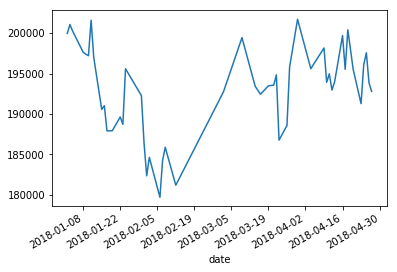

In [30]:
Risk.assets.plot()

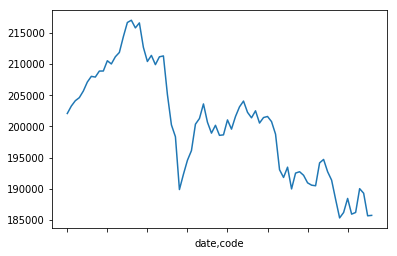

In [31]:
Risk.benchmark_assets.plot()

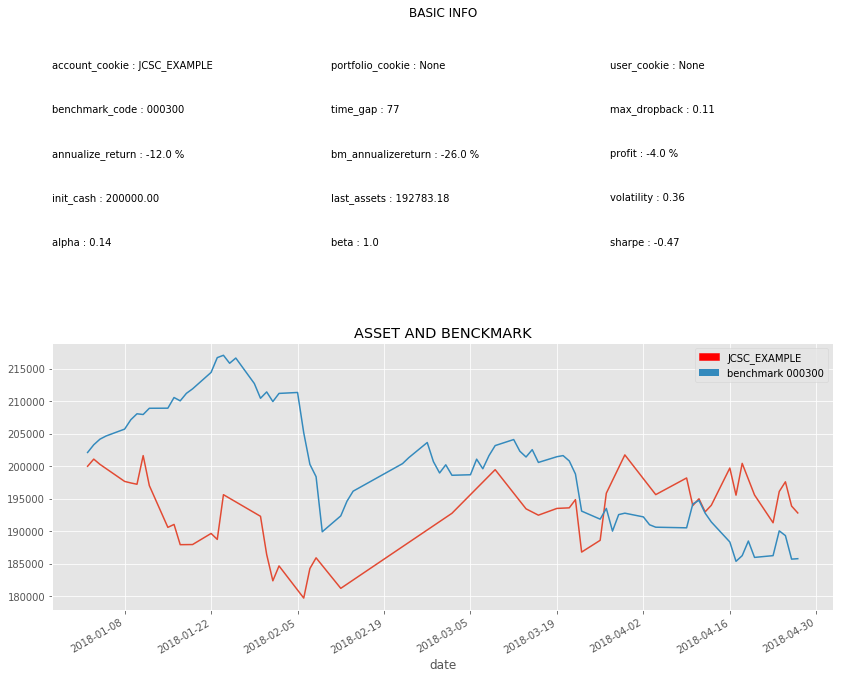

In [32]:
Risk.plot_assets_curve()

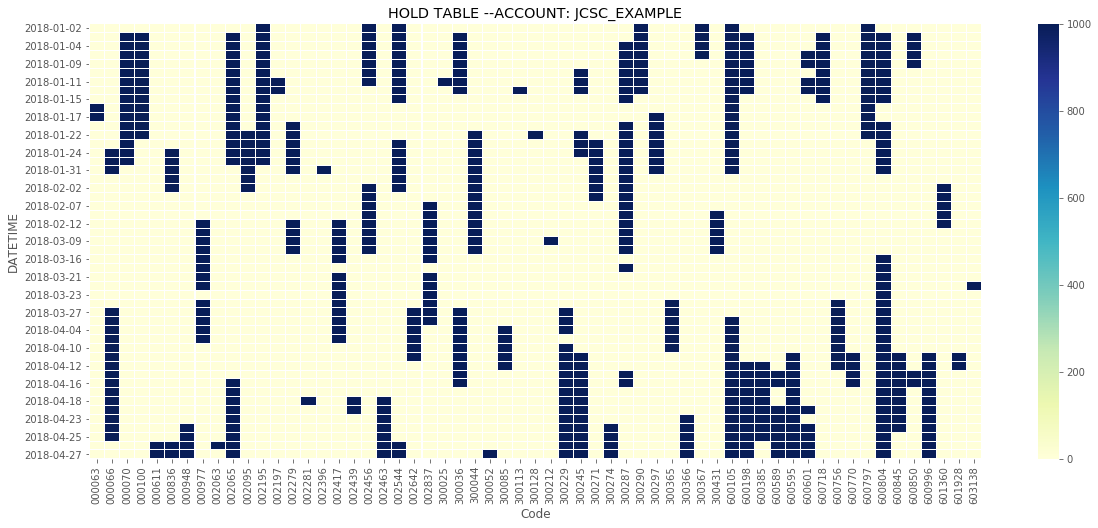

In [33]:
Risk.plot_dailyhold()

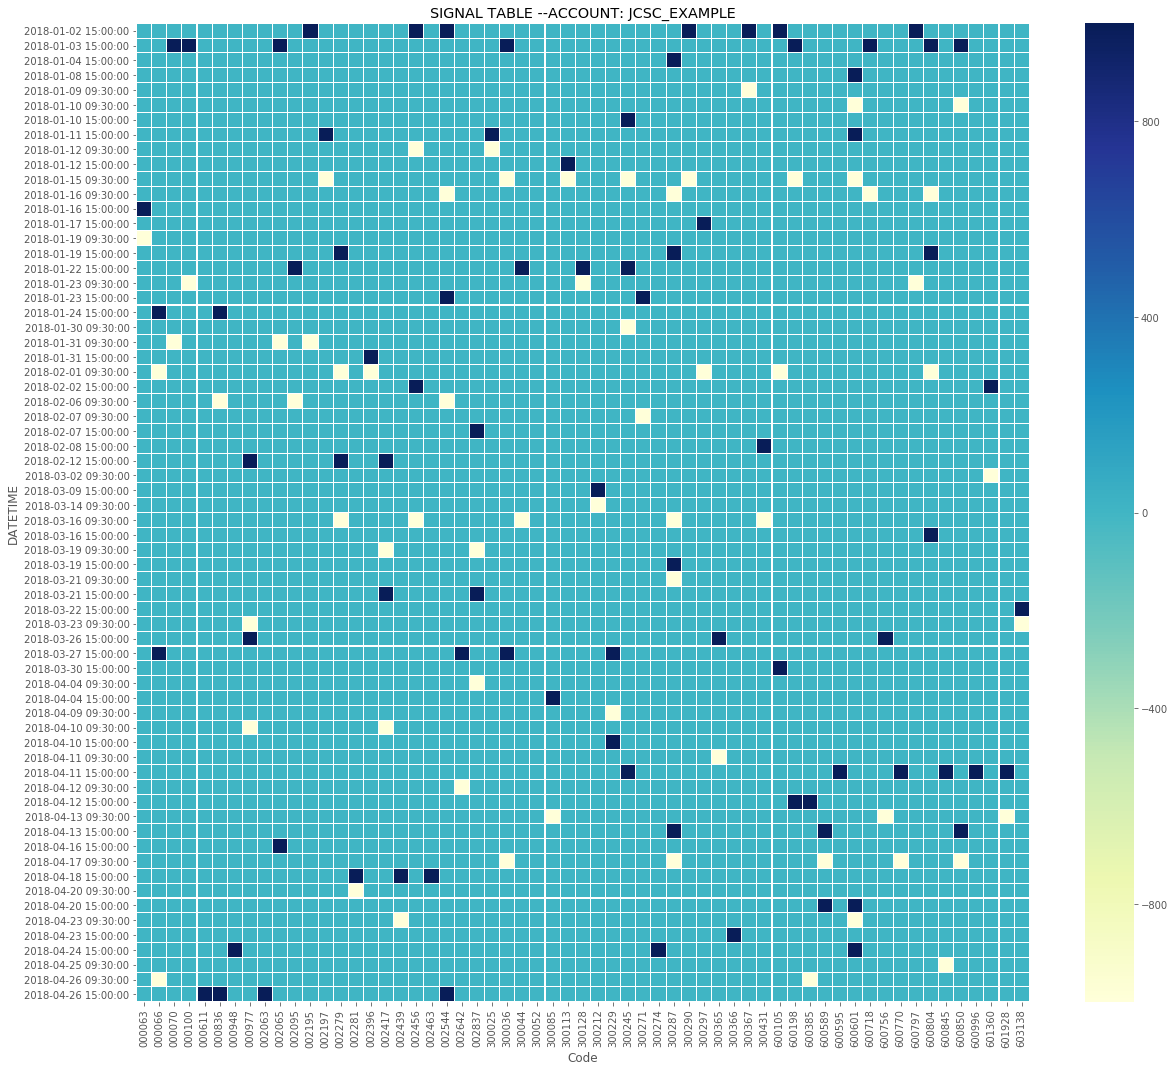

In [34]:
Risk.plot_signal()

In [35]:
Risk.profit_construct

{'total_buyandsell': -4780.0,
 'total_tax': -1593.88,
 'total_commission': -842.94,
 'total_profit': -7216.82}

In [36]:
Performance=QA.QA_Performance(Account)

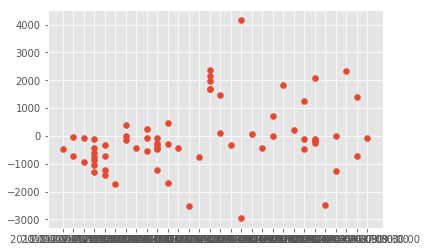

In [37]:
Performance.plot_pnlmoney(Performance.pnl_fifo)

## STEP6: 存储结果

In [38]:
Account.save()
Risk.save()

## STEP7: 查看存储的结果

In [39]:
account_info=QA.QA_fetch_account({'account_cookie':'JCSC_EXAMPLE'})

In [40]:
account=QA.QA_Account().from_message(account_info[0])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: QUANTAXIS 1.0.46 has changed the init_assets ==> init_cash, please pay attention to this change if you using init_cash to initial an account class,                
  """Entry point for launching an IPython kernel.


In [41]:
account

< QA_Account JCSC_EXAMPLE>